In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'D:\\soundcast_dev\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Fri, 21 Feb 2020 13:20


In [35]:
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))
df

,work_place,mode,modeled,observed,percent_diff,diff
0,Auburn,auto,33997,33431,0.016930,566
1,Auburn,transit,473,691,-0.315485,-218
2,Auburn,walk_and_bike,1513,1355,0.116605,158
3,Bellevue,auto,90611,96761,-0.063559,-6150
4,Bellevue,transit,3376,12505,-0.730028,-9129
5,Bellevue,walk_and_bike,6819,6464,0.054920,355
6,Everett,auto,62037,81741,-0.241054,-19704
7,Everett,transit,943,2766,-0.659074,-1823
8,Everett,walk_and_bike,4348,3961,0.097703,387
9,Federal Way,auto,23462,27590,-0.149619,-4128


r^2 : 0.908783903916


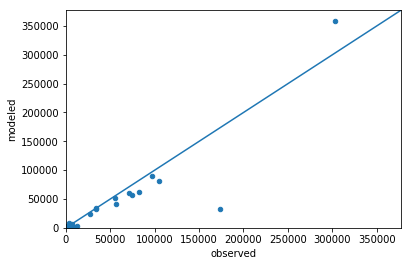

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [13]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [14]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.944807,0.942329,auto,0.002630,0.002478
3,Bellevue,0.898865,0.836093,auto,0.075078,0.062773
6,Everett,0.921415,0.923961,auto,-0.002756,-0.002547
9,Federal Way,0.928820,0.934367,auto,-0.005937,-0.005547
12,Kent,0.938363,0.924843,auto,0.014618,0.013520
15,Kirkland,0.913284,0.867539,auto,0.052730,0.045745
18,Redmond,0.923942,0.845137,auto,0.093246,0.078805
21,Renton,0.924699,0.905177,auto,0.021567,0.019522
24,Seattle,0.800904,0.549694,auto,0.456999,0.251210
27,Tacoma,0.890958,0.936522,auto,-0.048652,-0.045564


r^2 : 0.915768081422


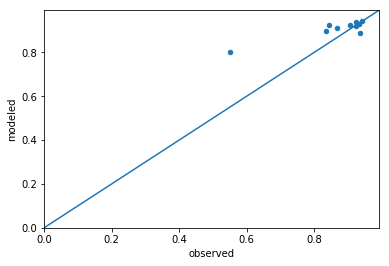

In [15]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [16]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.013145,0.019477,transit,-0.325111,-0.006332
4,Bellevue,0.033490,0.108053,transit,-0.690060,-0.074563
7,Everett,0.014006,0.031266,transit,-0.552029,-0.017259
10,Federal Way,0.016627,0.003725,transit,3.463312,0.012902
13,Kent,0.015182,0.047551,transit,-0.680733,-0.032370
16,Kirkland,0.016829,0.087258,transit,-0.807133,-0.070429
19,Redmond,0.026758,0.105497,transit,-0.746364,-0.078739
22,Renton,0.019806,0.042404,transit,-0.532931,-0.022599
25,Seattle,0.073735,0.315058,transit,-0.765963,-0.241323
28,Tacoma,0.016074,0.028488,transit,-0.435760,-0.012414


r^2 : 0.969806022106


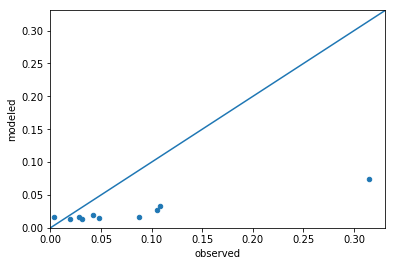

In [17]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [18]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.042048,0.038194,walk_and_bike,0.100903,0.003854
5,Bellevue,0.067645,0.055854,walk_and_bike,0.211097,0.011791
8,Everett,0.064579,0.044773,walk_and_bike,0.442365,0.019806
11,Federal Way,0.054553,0.061907,walk_and_bike,-0.118802,-0.007355
14,Kent,0.046456,0.027606,walk_and_bike,0.682836,0.018850
17,Kirkland,0.069887,0.045203,walk_and_bike,0.546061,0.024684
20,Redmond,0.049300,0.049366,walk_and_bike,-0.001335,-0.000066
23,Renton,0.055496,0.052419,walk_and_bike,0.058688,0.003076
26,Seattle,0.125360,0.135247,walk_and_bike,-0.073101,-0.009887
29,Tacoma,0.092967,0.034989,walk_and_bike,1.657007,0.057978


r^2 : 0.75777349737


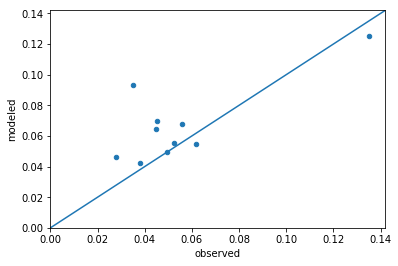

In [19]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))


In [30]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,990280.0,1046075.0
1,Kitsap,89429.0,111495.0
2,Pierce,235834.0,364974.0
3,Snohomish,231749.0,366964.0


In [36]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [38]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

C:\Anaconda\envs\model\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [46]:
df

,mode,geoid,place_name,observed,margin_of_error,to_tract,toexpfac,modeled,Census2010Tract,CountyName,CityRGProposed,CityRGExisting,GrowthCenterName,TAZID,FAZLargeAreaName,ZoneAreaType,District
0,SOV,53033000100,"Census Tract 1, King","2,198",315,53033000100,1084,"1,084","53,033,000,100",King,Metro,Metro,NaN,20,Seattle,Core & Larger Suburban Cities,3
1,HOV,53033000100,"Census Tract 1, King",610,216,53033000100,395,395,"53,033,000,100",King,Metro,Metro,NaN,20,Seattle,Core & Larger Suburban Cities,3
2,Transit,53033000100,"Census Tract 1, King",840,203,53033000100,47,47,"53,033,000,100",King,Metro,Metro,NaN,20,Seattle,Core & Larger Suburban Cities,3
3,Walk,53033000100,"Census Tract 1, King",169,92,53033000100,64,64,"53,033,000,100",King,Metro,Metro,NaN,20,Seattle,Core & Larger Suburban Cities,3
4,SOV,53033000200,"Census Tract 2, King","2,403",258,53033000200,943,943,"53,033,000,200",King,Metro,Metro,NaN,12,Seattle,Core & Larger Suburban Cities,3
5,HOV,53033000200,"Census Tract 2, King",428,163,53033000200,309,309,"53,033,000,200",King,Metro,Metro,NaN,12,Seattle,Core & Larger Suburban Cities,3
6,Transit,53033000200,"Census Tract 2, King","1,007",228,53033000200,32,32,"53,033,000,200",King,Metro,Metro,NaN,12,Seattle,Core & Larger Suburban Cities,3
7,Walk,53033000200,"Census Tract 2, King",69,80,53033000200,40,40,"53,033,000,200",King,Metro,Metro,NaN,12,Seattle,Core & Larger Suburban Cities,3
8,SOV,53033000300,"Census Tract 3, King","1,088",153,53033000300,500,500,"53,033,000,300",King,Metro,Metro,NaN,10,Seattle,Core & Larger Suburban Cities,3
9,HOV,53033000300,"Census Tract 3, King",186,92,53033000300,201,201,"53,033,000,300",King,Metro,Metro,NaN,10,Seattle,Core & Larger Suburban Cities,3


 r^2: 0.626334341526


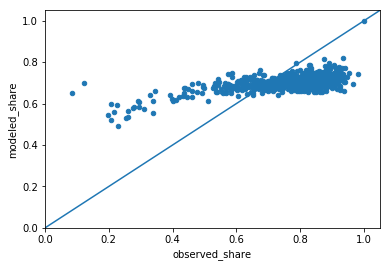

In [47]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.132337626312


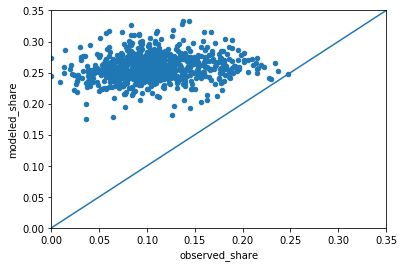

In [48]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.621957693424


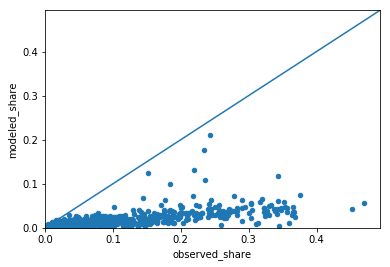

In [49]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.62277158486


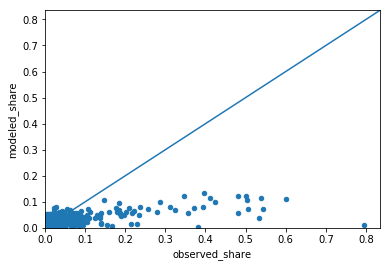

In [50]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

# Commute Flow
----

In [55]:
df = pd.read_csv(os.path.join(relative_path,'validation','district_worker_flows.csv'))

r^2 : 0.992387383464


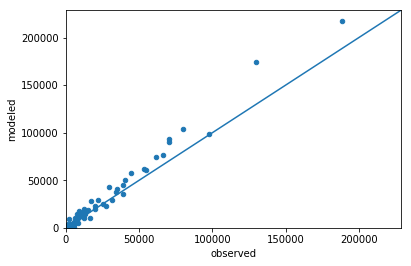

In [56]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

Modeled

In [59]:
df_m = pd.pivot_table(df, index='District_o', columns='District_d', values='modeled').reset_index()
df_m

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,1,"93,128","60,940","12,580","10,386","2,675","43,036","2,279",97,25,67,nan
1,2,"18,326","74,113","16,415","11,040","2,823","17,659","1,660",53,40,37,nan
2,3,"3,829","12,012","76,531","61,789","12,363","19,757","5,884",204,36,136,1
3,4,510,"1,502","19,794","90,222","14,525","10,664","5,883",189,22,142,4
4,5,318,849,"8,313","37,363","45,138","12,161","27,823","1,498",130,787,26
5,6,"10,235","9,866","15,335","35,686","14,170","217,723","29,402",931,35,982,17
6,7,516,774,"5,517","22,906","25,220","29,151","173,791","14,988",109,"14,917",189
7,8,33,69,484,"2,266","2,172","1,496","16,536","57,096",361,"23,138",911
8,9,6,38,80,"2,280",158,111,73,234,"103,489",107,"4,482"
9,10,78,134,"1,048","4,488","3,846","4,472","40,912","50,768",414,"98,144","1,102"


Observed

In [60]:
df_o = pd.pivot_table(df, index='District_o', columns='District_d', values='observed').reset_index()
df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,1,"70,611","54,721","8,918","12,011","4,306","29,472","4,840",344,261,473,nan
1,2,"15,234","61,446","11,647","11,955","3,255","12,574","3,489",201,340,296,nan
2,3,"3,151","9,453","66,117","53,446","11,591","19,816","7,768",459,343,361,55
3,4,580,"2,025","11,996","70,449","8,607","16,628","5,284",520,159,274,10
4,5,555,"1,196","7,322","34,107","39,032","11,594","17,311","1,327",168,517,69
5,6,"5,873","8,517","10,654","38,816","13,125","188,214","21,988",987,228,993,28
6,7,780,"2,619","8,182","27,571","25,502","31,684","129,832","7,790",281,"9,139",255
7,8,115,271,728,"3,749","2,435","2,484","13,195","44,748",753,"20,054","1,525"
8,9,64,691,783,"4,958","2,014","1,306","1,809","2,328","80,004","1,180","1,621"
9,10,270,669,"1,386","5,725","5,321","4,515","34,551","39,995","1,186","97,602","1,347"


Difference

In [61]:
df_m - df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,0,"22,517","6,219","3,662","-1,625","-1,631","13,564","-2,561",-247,-236,-406,nan
1,0,"3,092","12,667","4,768",-915,-432,"5,085","-1,829",-148,-300,-259,nan
2,0,678,"2,559","10,414","8,343",772,-59,"-1,884",-255,-307,-225,-54
3,0,-70,-523,"7,798","19,773","5,918","-5,964",599,-331,-137,-132,-6
4,0,-237,-347,991,"3,256","6,106",567,"10,512",171,-38,270,-43
5,0,"4,362","1,349","4,681","-3,130","1,045","29,509","7,414",-56,-193,-11,-11
6,0,-264,"-1,845","-2,665","-4,665",-282,"-2,533","43,959","7,198",-172,"5,778",-66
7,0,-82,-202,-244,"-1,483",-263,-988,"3,341","12,348",-392,"3,084",-614
8,0,-58,-653,-703,"-2,678","-1,856","-1,195","-1,736","-2,094","23,485","-1,073","2,861"
9,0,-192,-535,-338,"-1,237","-1,475",-43,"6,361","10,773",-772,542,-245


Percent Difference

In [63]:
pd.options.display.float_format = '{:0,.2f}'.format
(df_m - df_o)/df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,0.00,0.32,0.11,0.41,-0.14,-0.38,0.46,-0.53,-0.72,-0.90,-0.86,nan
1,0.00,0.20,0.21,0.41,-0.08,-0.13,0.40,-0.52,-0.74,-0.88,-0.88,nan
2,0.00,0.22,0.27,0.16,0.16,0.07,-0.00,-0.24,-0.56,-0.90,-0.62,-0.98
3,0.00,-0.12,-0.26,0.65,0.28,0.69,-0.36,0.11,-0.64,-0.86,-0.48,-0.60
4,0.00,-0.43,-0.29,0.14,0.10,0.16,0.05,0.61,0.13,-0.23,0.52,-0.62
5,0.00,0.74,0.16,0.44,-0.08,0.08,0.16,0.34,-0.06,-0.85,-0.01,-0.39
6,0.00,-0.34,-0.70,-0.33,-0.17,-0.01,-0.08,0.34,0.92,-0.61,0.63,-0.26
7,0.00,-0.71,-0.75,-0.34,-0.40,-0.11,-0.40,0.25,0.28,-0.52,0.15,-0.40
8,0.00,-0.91,-0.95,-0.90,-0.54,-0.92,-0.92,-0.96,-0.90,0.29,-0.91,1.76
9,0.00,-0.71,-0.80,-0.24,-0.22,-0.28,-0.01,0.18,0.27,-0.65,0.01,-0.18
